In [58]:
#Importing packages needed
%matplotlib inline
import scipy
from scipy import stats
from scipy import signal
from scipy.stats import chi2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime, timedelta
from numpy import absolute, sqrt, log
from textwrap import wrap
from IPython.display import Math, display
import itertools
import sys

**QUESTION 1: Filter Design**

This was done on a piece of paper that was scanned and attached to the PDF file.

**QUESTION 2: Power Within a Frequency Band**

In [59]:
#Defining a function to read minute data
def readMinuteData(filename):
    first, last, number = 0,0,0
    temp = []
    with open(filename, 'r') as file:
        #The map function changes type into a float
        first, last, number = map(float, itertools.islice(file, 0, 3))
        temp = [i for i in map(float, itertools.islice(file, 0, None))]
    time = np.linspace(first, last, int(number))
    df   = pd.DataFrame({"time": time, "temp": temp}) #Creating a Dataframe
    df['time'] = df['time'].apply(lambda time: datetime.fromordinal(int(time)) + timedelta(time%1) - timedelta(366))
    return df

def readMinuteDataa(filename):
    first, last, number = 0,0,0
    temp = []
    with open(filename, 'r') as file:
        #The map function changes type into a float
        first, last, number = map(float, itertools.islice(file, 0, 3))
        temp = [i for i in map(float, itertools.islice(file, 0, None))]
    time = np.linspace(first, last, int(number))
    dff = pd.DataFrame({"time": time, "temp": temp}) #Creating a Dataframe
    dff['time'] = dff['time'].apply(lambda time: datetime.fromordinal(int(time)) + timedelta(time%1) - timedelta(366))
    return dff

In [60]:
#Reading minute data from both stations
df  = readMinuteData("DeepCove_temperature_2019.dat")
dff = readMinuteDataa("JamesBay_temperature_2019.dat")

In [61]:
#Functions to search for the date needed
def searchDate(df, startDate, endDate):
    return df[(df['time']>=startDate) & (df['time']<=endDate)]

def searchDatee(dff, startDate, endDate):
    return dff[(dff['time']>=startDate) & (dff['time']<=endDate)]

In [62]:
startDate = pd.Timestamp(2017, 6, 1) #yyyy,m,d
endDate   = pd.Timestamp(2017, 9, 30)
#Summer will be a data frame with just time and temperature
summer  = searchDate(df, startDate, endDate)

summerr = searchDatee(dff,startDate,endDate)

In [63]:
summer

,time,temp
3899520,2017-06-01 00:00:00.294577,15.44
3899521,2017-06-01 00:01:00.294583,15.44
3899522,2017-06-01 00:02:00.294580,15.44
3899523,2017-06-01 00:03:00.294576,15.41
3899524,2017-06-01 00:04:00.294583,15.43
...,...,...
4073755,2017-09-29 23:55:00.307741,17.94
4073756,2017-09-29 23:56:00.307747,17.97
4073757,2017-09-29 23:57:00.307744,18.01
4073758,2017-09-29 23:58:00.307740,18.06


In [64]:
summerr

,time,temp
3899520,2017-06-01 00:00:00.294577,13.50
3899521,2017-06-01 00:01:00.294583,13.50
3899522,2017-06-01 00:02:00.294580,13.52
3899523,2017-06-01 00:03:00.294576,13.61
3899524,2017-06-01 00:04:00.294583,13.65
...,...,...
4073755,2017-09-29 23:55:00.307741,15.11
4073756,2017-09-29 23:56:00.307747,15.11
4073757,2017-09-29 23:57:00.307744,15.10
4073758,2017-09-29 23:58:00.307740,15.00


In [65]:
startDate = pd.Timestamp(2018, 11, 1)
endDate   = pd.Timestamp(2019, 2, 28)

#Winter will be a data frame with just time and temperature
winter  = searchDate(df, startDate, endDate)
winterr = searchDatee(dff,startDate,endDate)

In [66]:
winter

,time,temp
4645440,2018-11-01 00:00:00.350934,11.78
4645441,2018-11-01 00:01:00.350930,11.78
4645442,2018-11-01 00:02:00.350926,11.78
4645443,2018-11-01 00:03:00.350933,11.78
4645444,2018-11-01 00:04:00.350929,11.78
...,...,...
4816795,2019-02-27 23:55:00.363876,5.17
4816796,2019-02-27 23:56:00.363873,5.17
4816797,2019-02-27 23:57:00.363869,5.17
4816798,2019-02-27 23:58:00.363876,5.18


In [67]:
winterr

,time,temp
4645440,2018-11-01 00:00:00.350934,12.78
4645441,2018-11-01 00:01:00.350930,12.78
4645442,2018-11-01 00:02:00.350926,12.79
4645443,2018-11-01 00:03:00.350933,12.83
4645444,2018-11-01 00:04:00.350929,12.83
...,...,...
4816795,2019-02-27 23:55:00.363876,6.10
4816796,2019-02-27 23:56:00.363873,6.06
4816797,2019-02-27 23:57:00.363869,6.06
4816798,2019-02-27 23:58:00.363876,6.06


In [68]:
#Dropping nan values for Deep Cove and James Bay
temp       = summer.dropna()['temp']
time       = summer.dropna()['time']
tempwintdc = winter.dropna()['temp']
timewintdc = winter.dropna()['time']

tempjb     = summerr.dropna()['temp']
timejb     = summerr.dropna()['time']
tempwintjb = winterr.dropna()['temp']
timewintjb = winterr.dropna()['time']

In [69]:
fs   = 1./60. #sampling frequency (how often we sample)
fNyq = fs/2.

tt = 60*24*60 #Number of seconds
f  = 1./tt

fp     = f+f/2
fss    = f+f
No, Wn = signal.ellipord(fp/fNyq, fss/fNyq, 0.1, 40.)
#Use Nw, Wn in signal.ellip
b, a = signal.ellip(No, 0.1, 40., Wn, 'low')

#Highpass filter
ffp = f - f/4
ffs = f - f/2
Noo, Wnn = signal.ellipord(ffp/fNyq, ffs/fNyq, 0.1, 40.)
bb, aa   = signal.ellip(Noo,0.1,40., Wnn, 'high')

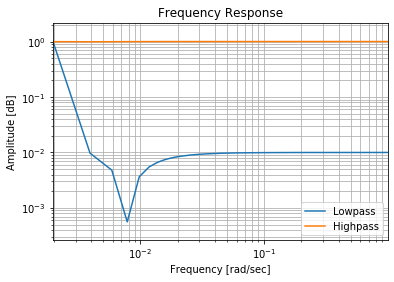

In [70]:
w, h   = signal.freqz(b,a)
ww, hh = signal.freqz(bb, aa)
plt.figure()
plt.loglog(w/np.pi, (np.abs(h)), label='Lowpass')
plt.loglog(ww/np.pi, (np.abs(hh)), label='Highpass')
plt.legend()
plt.title('Frequency Response')
plt.xlabel('Frequency [rad/sec]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

In [71]:
#Making a function
def filterfreq(time,temp):
    #Lowpass filter
    temp = summer.dropna()['temp']
    time = summer.dropna()['time']
    fs   = 1./60. # sampling frequency (how often we sample)
    fNyq = fs/2.
    tt   = 60*24*60 #1440 minutes, but in seconds
    f    = 1./tt
    fp   = f+f/2
    fss  = f+f
    N, Wn = signal.ellipord(fp/fNyq, fss/fNyq, .1, 40.)
    # Use Nw, Wn in signal.ellip
    b, a = signal.ellip(N, .1, 40., Wn, 'low')
    
    #Highpass filter
    ffp = f - f/4
    ffs = f - f/2
    N, Wn  = signal.ellipord(ffp/fNyq, ffs/fNyq, .1, 40.)
    bb, aa = signal.ellip(N,.1,40., Wn, 'high')

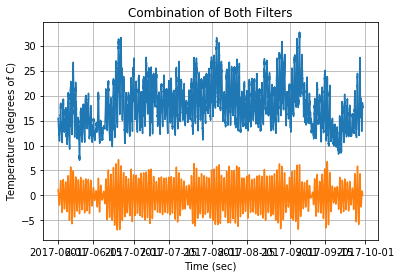

In [72]:
#Applying filters
y    = signal.filtfilt(b,a,temp)
ywdc = signal.filtfilt(b,a,tempwintdc)
yy   = signal.filtfilt(bb,aa,y)

yjb  = signal.filtfilt(b,a,tempjb)
ywjb = signal.filtfilt(b,a,tempwintjb)
yyy  = signal.filtfilt(bb,aa,yjb)


plt.figure()
plt.plot(time,temp)
plt.plot(time,yy)
plt.grid(which='both',axis='both')
plt.xlabel('Time (sec)')
plt.ylabel('Temperature (degrees of C)')
plt.title('Combination of Both Filters')
plt.show()

In [73]:
#Variance

#Deep Cove
c  = np.var(temp)
cc = np.var(yy)

#James Bay
cjb  = np.var(tempjb)
ccjb = np.var(yyy)

print(c,cc)
print(cjb,ccjb)

19.75951061549841 8.697235948504717
7.742919803026346 3.0146915193552295


The variance is lower after applying the filters just like we expected.

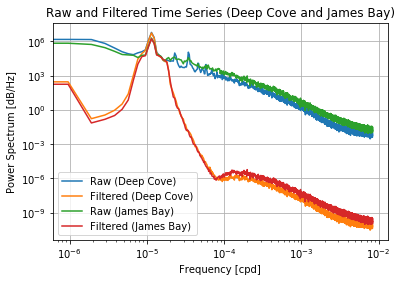

In [74]:
#Frequency and power spectrum density
f, Pxx       = signal.welch(temp, fs, nperseg=len(temp)/10)
ff, PPxx     = signal.welch(yy, fs, nperseg=len(temp)/10)
fjb,Pxxjb    = signal.welch(tempjb,fs,nperseg=len(tempjb)/10)
ffjb, PPxxjb = signal.welch(yyy,fs,nperseg=len(tempjb)/10)

plt.figure()
plt.loglog(f,Pxx,label='Raw (Deep Cove)')
plt.loglog(ff,PPxx,label='Filtered (Deep Cove)')
plt.loglog(fjb,Pxxjb,label='Raw (James Bay)')
plt.loglog(ffjb,PPxxjb,label='Filtered (James Bay)')
plt.title('Raw and Filtered Time Series (Deep Cove and James Bay)')
plt.xlabel('Frequency [cpd]')
plt.ylabel('Power Spectrum [dB/Hz]')
plt.legend()
plt.grid()
plt.show()

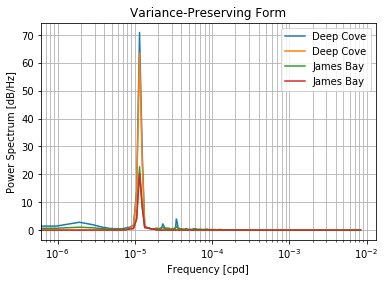

In [75]:
#Plotting all data
plt.figure()
plt.title('Variance-Preserving Form')
plt.semilogx(f,f*Pxx,label='Deep Cove')
plt.semilogx(ff,ff*PPxx,label='Deep Cove')
plt.semilogx(fjb,fjb*Pxxjb,label='James Bay')
plt.semilogx(ffjb,ffjb*PPxxjb,label='James Bay')
plt.xlabel('Frequency [cpd]')
plt.ylabel('Power Spectrum [dB/Hz]')
plt.legend()
plt.grid(which='both',axis='both')
plt.show()

In [76]:
integ = np.trapz(f, Pxx)
print(abs(integ))

integ2 = np.trapz(ff,PPxx)
print(abs(integ2))

integjb = np.trapz(fjb,Pxxjb)
print(abs(integjb))
integ2jb = np.trapz(ffjb,PPxxjb)
print(abs(integ2jb))

14.777120623793927
8.805838248577633
6.176951413784716
2.982216542894176


The variance does not change overall but it does change when the filters are applied. It can be seen that during winter season, there are more temperature fluctuations than compared to the summer season. The low-pass filter removes the variance from high frequencies, and the high-pass filter removes the variance from low frequencies. Hence, the variance changs only where the filters are applied.

**QUESTION 3: Filtering of Synthetic Data**

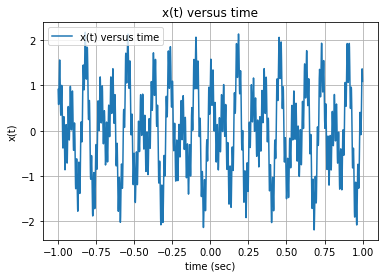

In [77]:
N          = 3*10**4
t          = np.linspace(-15,15,N) #in seconds
a1 ,a2 ,a3 = 22, 14, 143
x1         = np.cos(a1*np.pi*t)
xt         = x1 + 0.7*np.sin(a2*np.pi*t)+0.5*np.sin(a3*np.pi*t)

condition = np.where((t>-1) & (t<1))
small_t   = t[condition]
small_x   = xt[condition]

plt.figure()
plt.plot(small_t,small_x,label='x(t) versus time')
plt.xlabel('time (sec)')
plt.ylabel('x(t)')
plt.legend()
plt.title('x(t) versus time')
plt.grid()
plt.show()

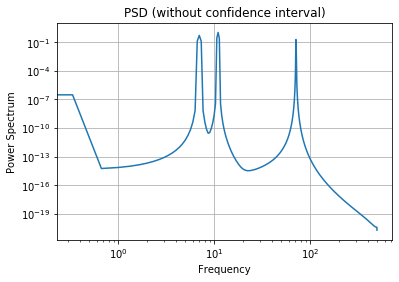

In [83]:
fs     = N/30
f, Pxx = signal.welch(xt,fs,nperseg=N/10)

plt.figure()
plt.title('PSD (without confidence interval)')
plt.loglog(f,Pxx)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.grid()

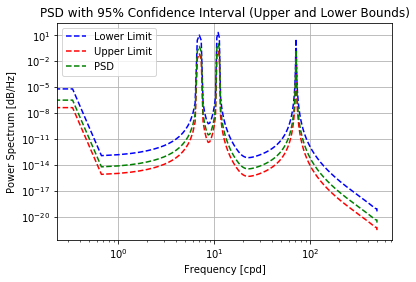

In [79]:
#95% confidence interval
v = 2
c = chi2.ppf([0.975, 0.025], v)
c = v / (2*c)
Pxx_lower = Pxx * c[1]
Pxx_upper = Pxx * c[0]

plt.figure()
plt.loglog(f, Pxx_lower, '--', c='b', label='Lower Limit')
plt.loglog(f, Pxx_upper, '--', c='r', label='Upper Limit')
plt.loglog(f, Pxx, '--', c='g',label='PSD')
plt.legend()
plt.grid()
plt.title('PSD with 95% Confidence Interval (Upper and Lower Bounds)')
plt.xlabel('Frequency [cpd]')
plt.ylabel('Power Spectrum [dB/Hz]')
plt.show()

In [80]:
#Using a Butterworth filter

fs = N/30

#Remove a3
Nn3, Wn3 = signal.buttord(25, 30, 0.1, 40., fs=fs)
sos3 = signal.butter(Nn3, Wn3, 'lp', output='sos', fs=fs)
w, h = signal.sosfreqz(sos3)

#Remove a1
Nn1, Wn1 = signal.buttord(10, 14, 0.1, 40., fs=fs)
sos1     = signal.butter(Nn1, Wn1, 'hp', output='sos', fs=fs)
ww, hh   = signal.sosfreqz(sos1)

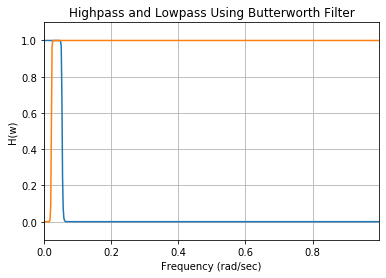

In [81]:
#Plotting
plt.figure()
plt.title('Highpass and Lowpass Using Butterworth Filter')
plt.plot(w/np.pi, np.abs(h), label='Highpass')
plt.plot(ww/np.pi, np.abs(hh), label='Lowpass')
plt.xlabel('Frequency (rad/sec)')
plt.ylabel('H(w)')
plt.margins(0,0.1)
plt.grid()
plt.show()

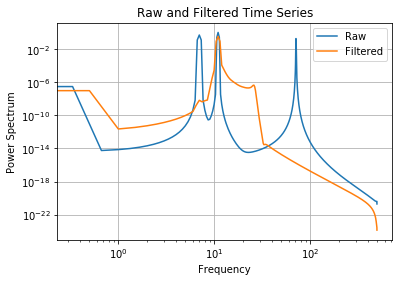

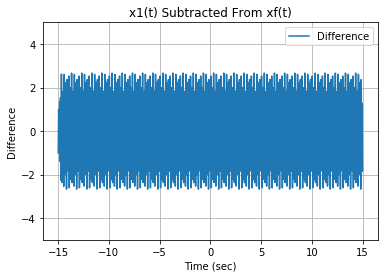

In [82]:
#Applying filters
y        = signal.sosfilt(sos3, xt)
yy       = signal.sosfilt(sos1, y)
ff, PPxx = signal.welch(yy, fs, nperseg=2000)

#Plotting unfiltered and filtered time series
plt.figure()
plt.loglog(f, Pxx, label='Raw')
plt.loglog(ff, PPxx, label='Filtered')
plt.grid()
plt.title('Raw and Filtered Time Series')
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.legend()
plt.show()

#Plotting filtered time series minus x1(t)
plt.figure()
plt.title('x1(t) Subtracted From xf(t)')
plt.plot(t,y-x1,label='Difference')
plt.ylim(-5,5)
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time (sec)')
plt.ylabel('Difference')
plt.show()